In [6]:
import os
from glob import glob
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [7]:
# Get data for example
data = et.data.get_data("vignette-landsat")

# Set working directory
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Stack the Landsat 8 bands
# This creates a numpy array with each "layer" representing a single band
# You can use the nodata= parameter to mask nodata values
landsat_path = glob(
    os.path.join(
        "data",
        "Beijing-90",
        "LT05_L2SP_123032_19900918_20200915_02_T1_SR_B*", 
    )
)
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path, nodata=-9999)

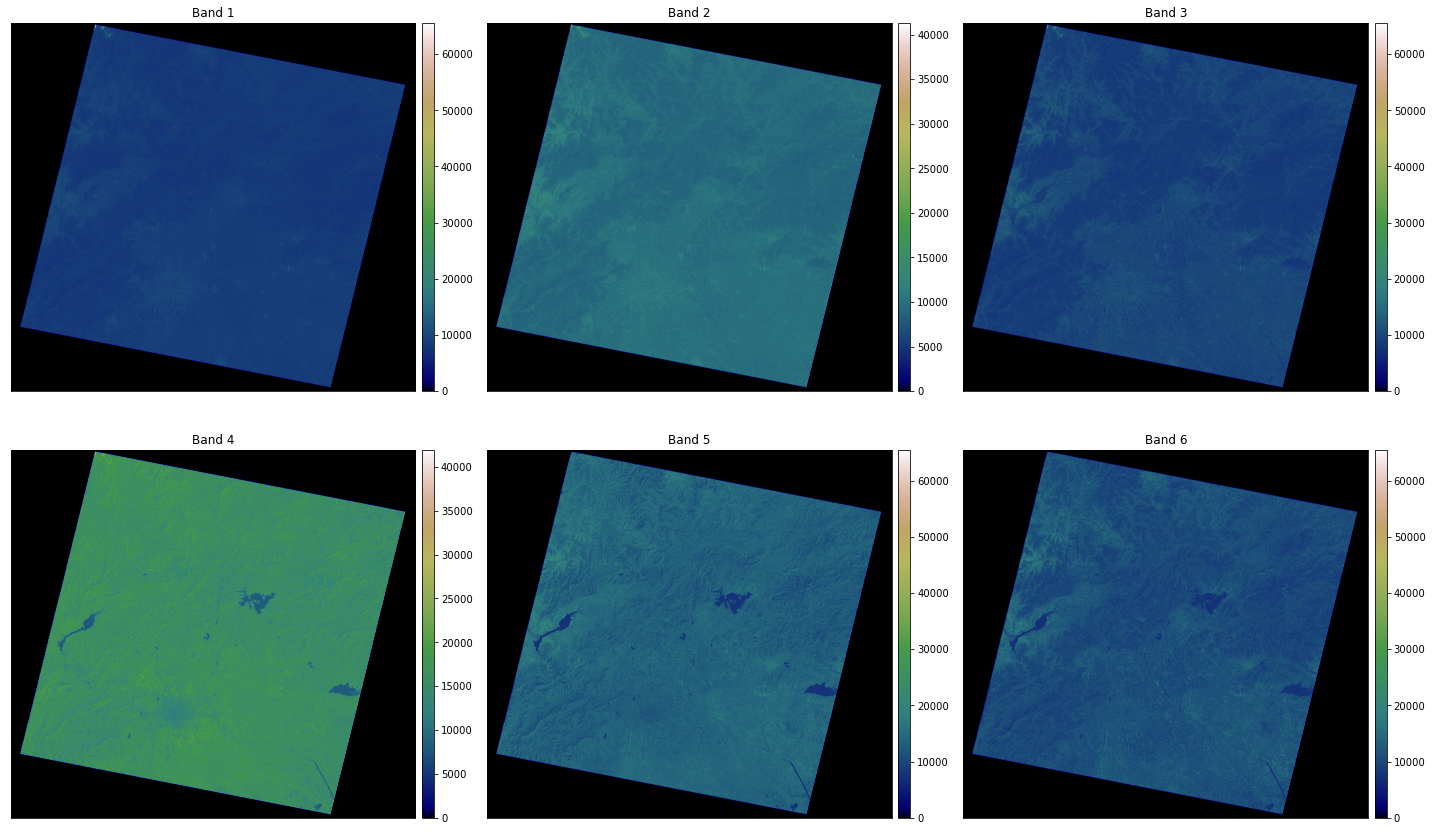

In [8]:
ep.plot_bands(array_stack,
cmap = 'gist_earth',
figsize = (20, 12),
cols = 3,
cbar = True)
plt.show()



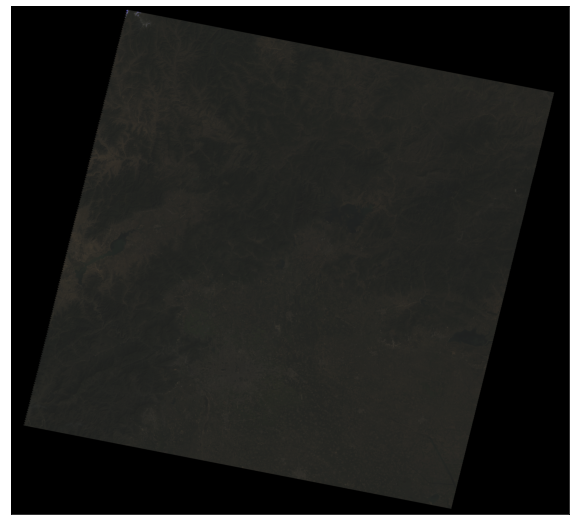

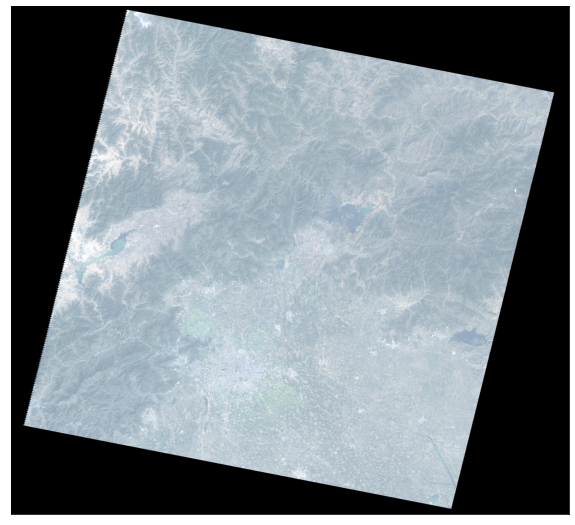

In [9]:
# RGB Composite Image
rgb = ep.plot_rgb(array_stack,
rgb=(2,1,0),
figsize=(10, 16))
plt.show()
# RGB Composite Image with Strech
ep.plot_rgb(array_stack,
rgb=(2, 1, 0),
stretch=True,
str_clip=0.3,
figsize=(10, 16))
plt.show()

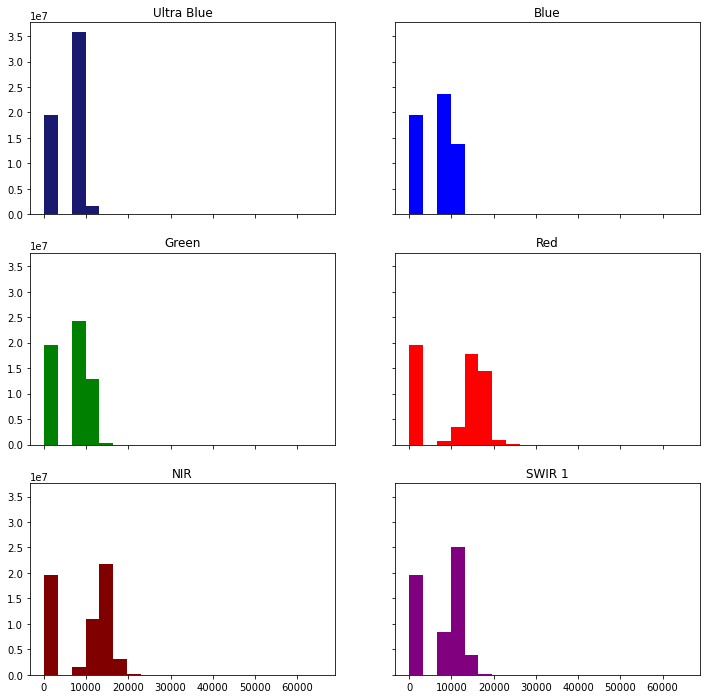

In [10]:
colors_list = [
    "midnightblue",
    "Blue",
    "Green",
    "Red",
    "Maroon",
    "Purple",
   
]
titles = ["Ultra Blue", "Blue", "Green", "Red", "NIR", "SWIR 1"]
ep.hist(array_stack, colors=colors_list, title=titles)
plt.show()

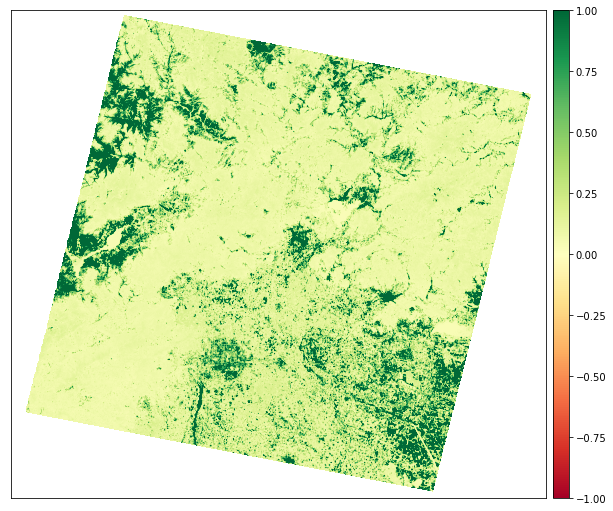

0.27573438564485714

In [15]:
ndvi = es.normalized_diff(array_stack[3], array_stack[4])
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14)) #for colors https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()
ndvi.mean()


In [16]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_class_bins)

array([-inf, 0.  , 0.1 , 0.25, 0.4 ,  inf])

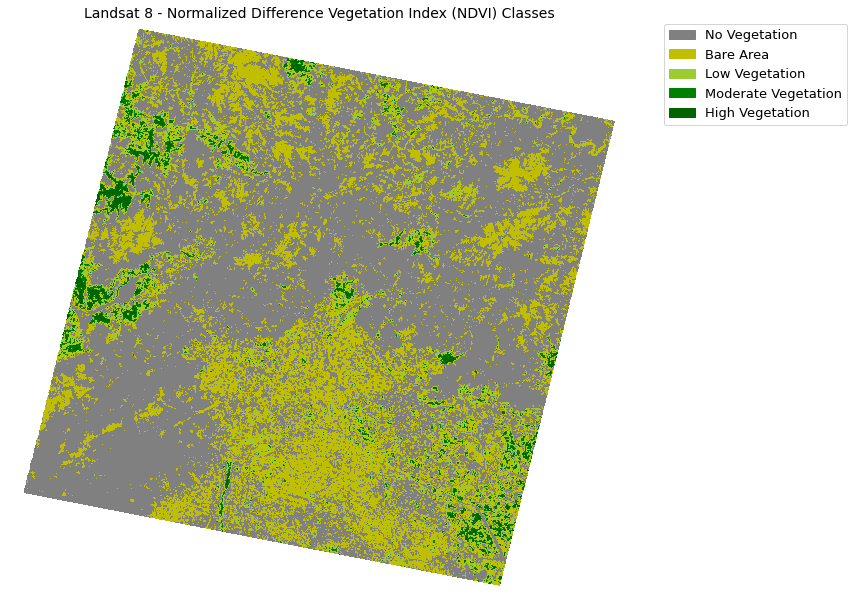

In [17]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()
